# Customer Churn Prediction

author: Elżbieta Karasińska,
date: December 2025

## Data loading & initial checks

Loding the dataset, inspecting shape, dtypes and missing values:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datapath = "./data/dataset.csv"

df = pd.read_csv(datapath)

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            NaN  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print("Shape:")
print(df.shape)

print("Info:")
print(df.info())

Shape:
(7043, 21)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   6836 non-null   object 
 9   OnlineSecurity    6648 non-null   object 
 10  OnlineBackup      6768 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       6350 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          6624 non-null   object 
 16  PaperlessBilling  

In the dataset, here are 7043 instances, each with 21 features.

----------------------------------------------------------------------------
Converting TotalCharges to numeric with errors='coerce':

In [4]:
print("Before conversion:")
print(df['TotalCharges'].dtypes)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("After conversion:")
print(df['TotalCharges'].dtypes)

Before conversion:
object
After conversion:
float64


----------------------------------------------------------------------------
Imputing missing values with mean or most frequent value:

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)


print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


There are no missing values after imputation.

----------------------------------------------------------------------------
Class balance for feature Churn:

Churn 'Yes' count: 1869 (26.54%)
Churn 'No' count: 5174 (73.46%)


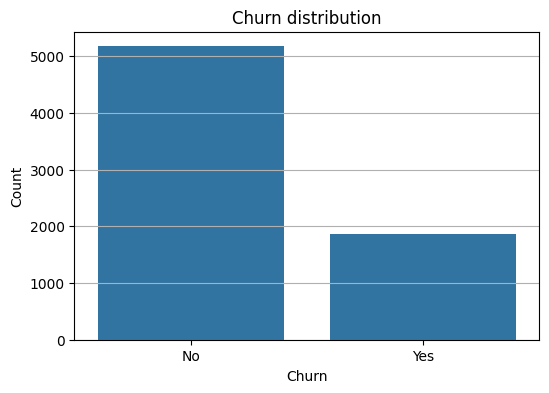

In [6]:
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

print(f"Churn 'Yes' count: {len(churn_yes)} ({len(churn_yes)/len(df)*100:.2f}%)")
print(f"Churn 'No' count: {len(churn_no)} ({len(churn_no)/len(df)*100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

Dataset is quite imbalanced with 73.5% of instances belonging to class 'No' and 26.5% to class 'Yes', but not critically so.

## EDA

Distribution plots of numeric features and skewness values:

In [7]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Numeric features:")
print(numeric_features)

Numeric features:
['tenure', 'MonthlyCharges', 'TotalCharges']


(defining numeric and categorical features must be done by hand because of 'SeniorCitizen' being encoded as 0/1)

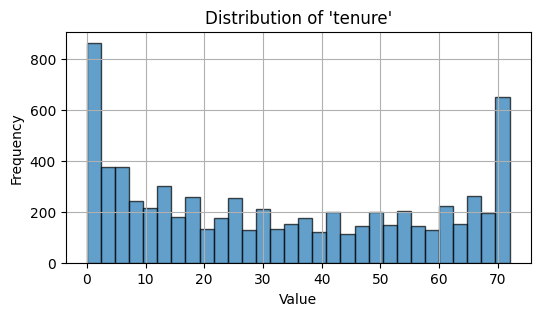

Skewness of 'tenure': 0.24


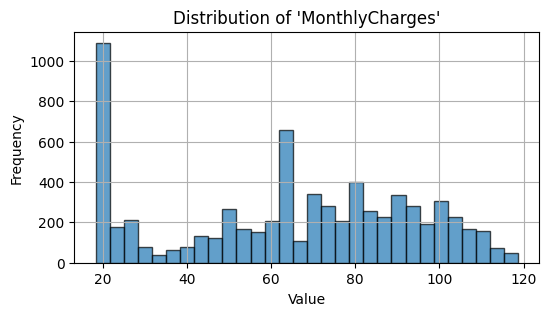

Skewness of 'MonthlyCharges': -0.23


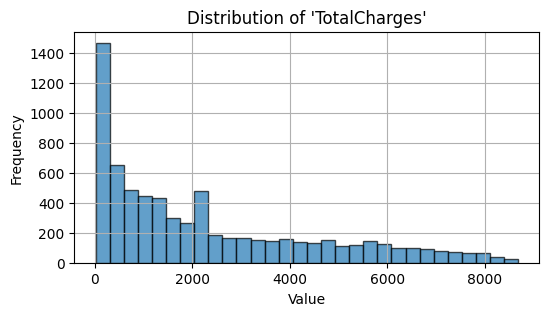

Skewness of 'TotalCharges': 0.98


In [8]:
for feature in numeric_features:
    plt.figure(figsize=(6, 3))
    plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribution of '{feature}'")
    plt.xlabel("Value")
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    skewness = df[feature].skew()
    print(f"Skewness of '{feature}': {skewness:.2f}")

'TotalCharges' and 'tenure' are right-skewed, while 'MonthlyCharges' is left-skewed. 'TotalCharges' has the highest skewness of 0.98.

-----------------------------------------------------------------------------------------------------------
Transformation of numerical featurs:

Applying log1p transformation to 'TotalCharges' because of high skewness:

Skewness of 'TotalCharges' before transformation: 0.98
Skewness of 'TotalCharges' after log1p transformation: -0.80


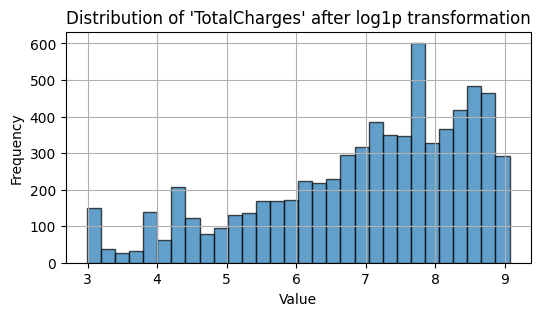

In [9]:
feature = 'TotalCharges'

print(f"Skewness of '{feature}' before transformation: {df[feature].skew():.2f}")

df[feature] = np.log1p(df[feature])

print(f"Skewness of '{feature}' after log1p transformation: {df[feature].skew():.2f}")

plt.figure(figsize=(6, 3))
plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.7)
plt.title(f"Distribution of '{feature}' after log1p transformation")
plt.xlabel("Value")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Conclusion**: After applying the transformations, 'TotalCharges' is more symmetrical (skewness reduced from 0.98 to -0.80), which can improve model performance. After transformation, the right-leaning tail became left-leaning.

-------------------------------------------------------------------------------------
Visualization of categorical relationships and pairwise plots for key features:

First, I drop 'customerID' as it has too many unique values, and is not useful for analysis:

In [10]:
df.drop('customerID', axis=1, inplace=True)

In [11]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

print("Categorical features:")
print(categorical_features)

Categorical features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Countplots of categorical features against Churn:

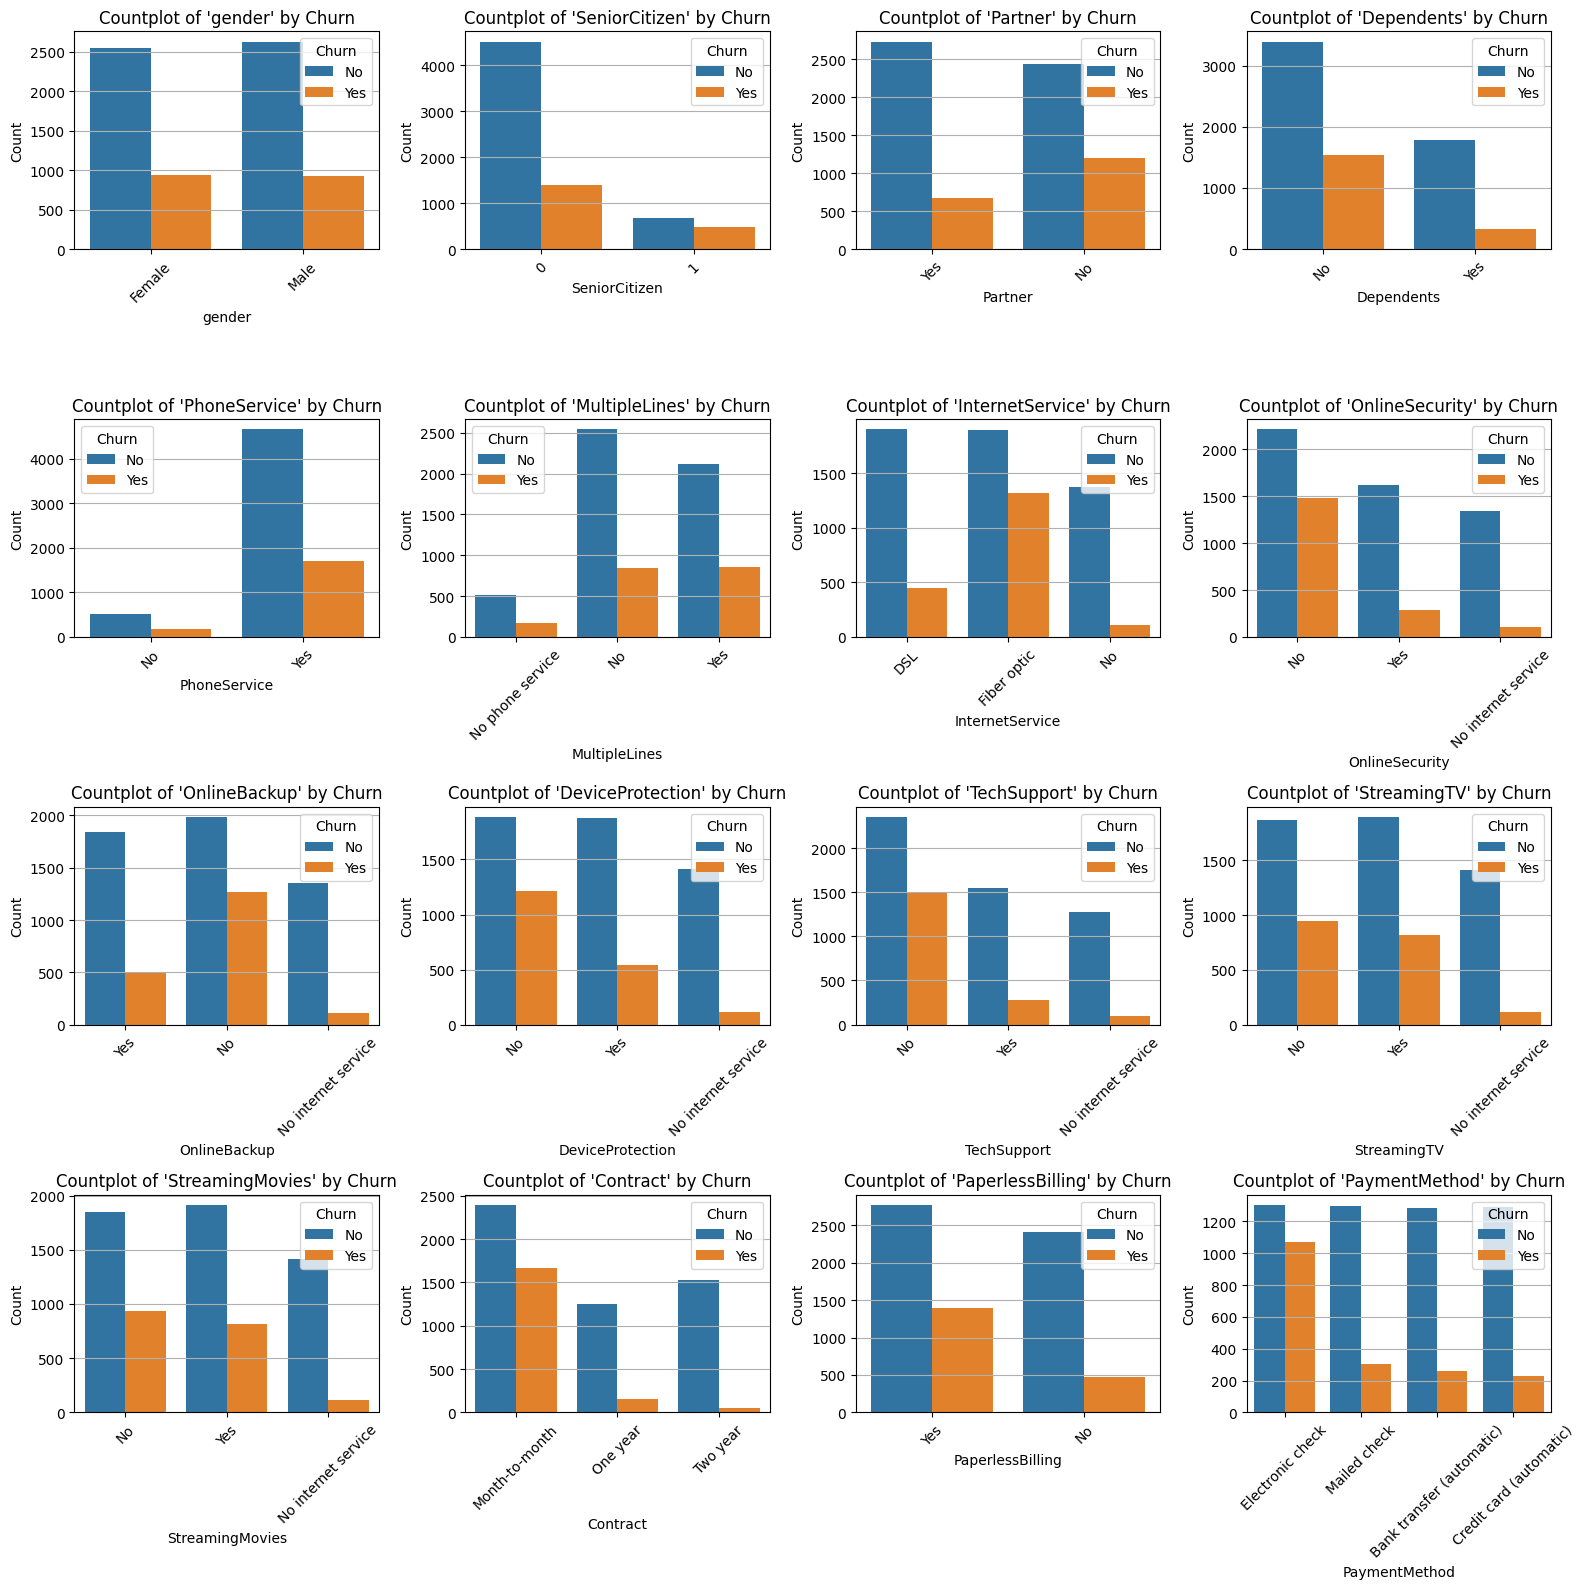

In [12]:
plt.figure(figsize=(16, 16))
for feature in categorical_features:
    plt.subplot(4, 4, categorical_features.index(feature) + 1)
    sns.countplot(x=feature, data=df, hue='Churn')
    plt.title(f"Countplot of '{feature}' by Churn")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Churn')
plt.tight_layout()
plt.show()

We can observe that older customers are more likely to churn. Other groups especially likely to churn are those with 'month-to-month' contracts, 'Fiber optic' internet service, and no tech support.

Pairplots of numeric features colored by Churn:

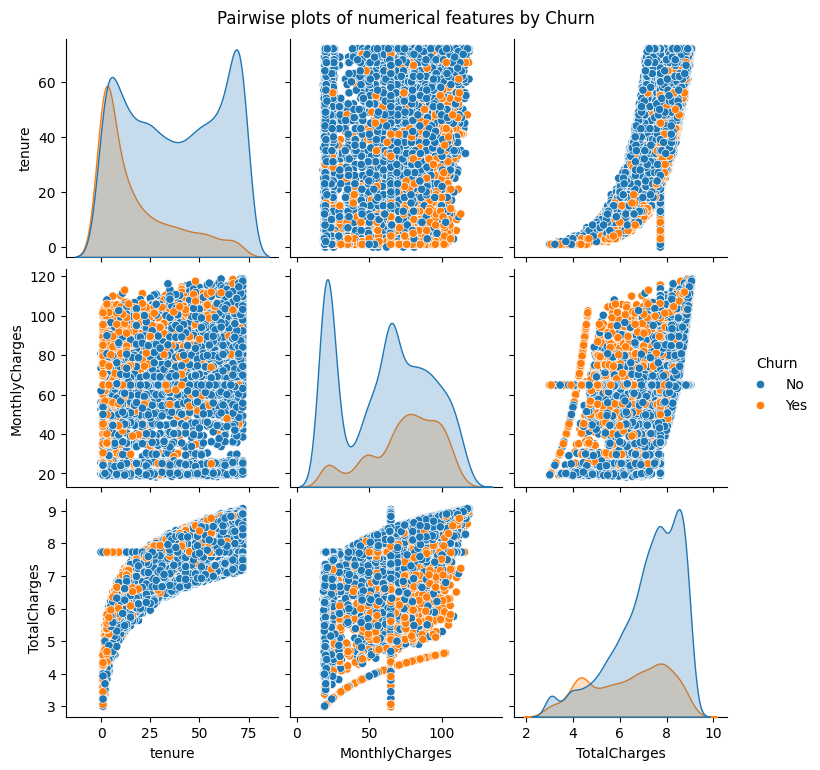

In [13]:
# Pairwise plots for selected numerical features
sns.pairplot(df, vars=numeric_features, hue='Churn', diag_kind='kde')
plt.suptitle("Pairwise plots of numerical features by Churn", y=1.02)
plt.show()

It is quite intuitive that there exist a positive correlation between 'tenure' and 'TotalCharges' (the longer the customer stays, the more they have paid totally). However, there seems not to be a clear relationship between 'MonthlyCharges' and 'tenure'.

## Feature engineering

**New numeric feature #1: 'OptionalServices'** 

Counts number of optional services subscribed by customer, where optional services include: 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies'.

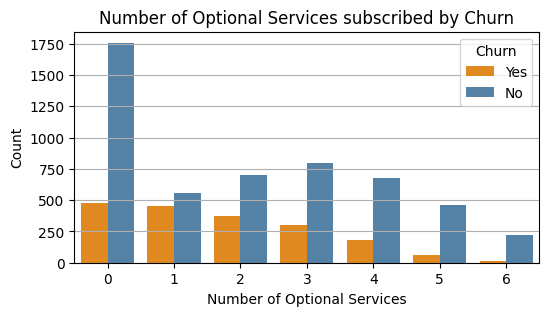

In [14]:
optional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['OptionalServices'] = df[optional_services].apply(lambda x: sum(x == 'Yes'), axis=1)
numeric_features += ['OptionalServices']

plt.figure(figsize=(6, 3))
sns.countplot(x='OptionalServices', data=df, hue='Churn', palette={'No': 'steelblue', 'Yes': 'darkorange'})
plt.title("Number of Optional Services subscribed by Churn")
plt.xlabel("Number of Optional Services")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

Clients with one or two optional services are more likely to churn than those with none or many optional services.

**New categorical feature #2: 'TenureQuantile'**

Groups 'tenure' into four bins based on quartiles.

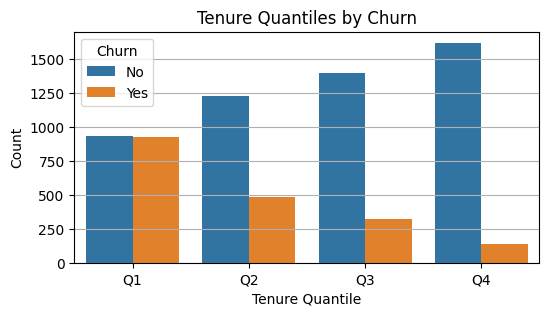

In [15]:
df['TenureQuantile'] = pd.qcut(df['tenure'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
categorical_features += ['TenureQuantile']

plt.figure(figsize=(6, 3))
sns.countplot(x='TenureQuantile', data=df, hue='Churn')
plt.title("Tenure Quantiles by Churn")
plt.xlabel("Tenure Quantile")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

The longer the tenure, the less likely the customer is to churn.

**New categorical feature #3: 'MonthlyChargesQuantile'**

Groups 'MonthlyCharges' into four bins based on quartiles.

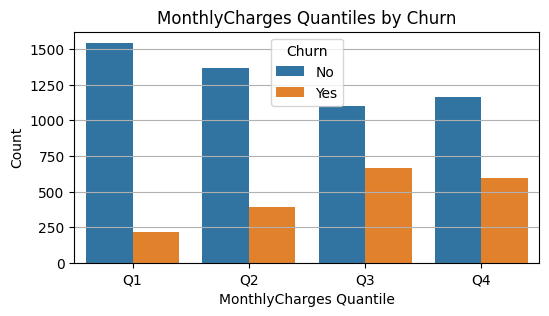

In [16]:
df['MonthlyChargesQuantile'] = pd.qcut(df['MonthlyCharges'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
categorical_features += ['MonthlyChargesQuantile']

plt.figure(figsize=(6, 3))
sns.countplot(x='MonthlyChargesQuantile', data=df, hue='Churn')
plt.title("MonthlyCharges Quantiles by Churn")
plt.xlabel("MonthlyCharges Quantile")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

Intuitively, customers with higher monthly charges are more likely to churn.

### Saving final dataset to CSV file

In [17]:
# Swiching 'Churn' column to be the first column
df = df[['Churn'] + [col for col in df.columns if col != 'Churn']]

save_path = "./data/final_dataset.csv"
df.to_csv(save_path, index=False)

## Modeling setup

Splitting off a 5% holdout (stratified) for the web-app testing. It would not be used in models training:

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split

In [19]:
holdout_df, main_df = train_test_split(df, test_size=0.95, stratify=df['Churn'], random_state=2137)  

Saving holdout to CSV file:

In [20]:
save_path_holdout = "./data/holdout_dataset.csv"
holdout_df.to_csv(save_path_holdout, index=False)

----------------------------------------------------------------------------
Building the ColumnTransformer for preprocessing:

(using StandardScaler for numeric features, and OneHotEncoder(handle_unknown='ignore') for categorical features)

In [21]:
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

----------------------------------------------------------------------------

Comparing five algorithms via StratifiedKFold(n_splits=5, shuffle=True, random_state=42):
* Logistic Regression
* Random Forest
* Support Vector Machine
* Multi-layer Perceptron
* AdaBoost

Use cross_validate to compute accuracy, precision, recall, f1, ROC AUC
Present a table of results and a bar chart comparison of each algorithm for each metric.

In [22]:
splits = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = main_df.drop('Churn', axis=1)
y = main_df['Churn'].map({'No': 0, 'Yes': 1})

scores_list = []


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
pipeline = make_pipeline(column_transformer, log_reg)

scores = cross_validate(
    pipeline, X, y, cv=splits,
    scoring=['accuracy','precision','recall','f1','roc_auc']
)

print("Logistic Regression scores:")
print(pd.DataFrame(scores))

scores_list.append(('Logistic Regression', scores))

Logistic Regression scores:
   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  0.050736    0.024640       0.781927        0.611111     0.494382  0.546584   
1  0.047056    0.024595       0.815396        0.692857     0.546479  0.611024   
2  0.043621    0.025383       0.810912        0.675862     0.552113  0.607752   
3  0.044084    0.023644       0.799701        0.667954     0.487324  0.563518   
4  0.043519    0.024039       0.809417        0.663399     0.571831  0.614221   

   test_roc_auc  
0      0.822291  
1      0.852826  
2      0.843666  
3      0.857550  
4      0.856034  


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
pipeline = make_pipeline(column_transformer, rf_clf)

scores = cross_validate(
    pipeline, X, y, cv=splits,
    scoring=['accuracy','precision','recall','f1','roc_auc']
)

print("Random Forest scores:")
print(pd.DataFrame(scores))

scores_list.append(('Random Forest', scores))

Random Forest scores:
   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  0.523520    0.071810       0.789395        0.645669     0.460674  0.537705   
1  0.547862    0.065543       0.789985        0.648000     0.456338  0.535537   
2  0.586200    0.078095       0.787743        0.619529     0.518310  0.564417   
3  0.637620    0.074195       0.786996        0.633588     0.467606  0.538088   
4  0.626468    0.078034       0.785501        0.618056     0.501408  0.553655   

   test_roc_auc  
0      0.809132  
1      0.826050  
2      0.809272  
3      0.828317  
4      0.835955  


In [25]:
from sklearn import svm

svm_clf = svm.SVC(random_state=42, probability=True)
pipeline = make_pipeline(column_transformer, svm_clf)

scores = cross_validate(
    pipeline, X, y, cv=splits,
    scoring=['accuracy','precision','recall','f1','roc_auc']
)
print("SVM scores:")
print(pd.DataFrame(scores))

scores_list.append(('SVM', scores))

SVM scores:
   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  4.753180    0.564730       0.787155        0.644898     0.443820  0.525790   
1  4.207404    0.582674       0.804185        0.692946     0.470423  0.560403   
2  4.176095    0.584682       0.803438        0.667883     0.515493  0.581876   
3  4.431670    0.617116       0.803438        0.709091     0.439437  0.542609   
4  4.293617    0.587770       0.796712        0.654275     0.495775  0.564103   

   test_roc_auc  
0      0.789712  
1      0.799136  
2      0.797326  
3      0.793340  
4      0.827255  


### Multi-layer Perceptron

In [26]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=42, max_iter=1000)
pipeline = make_pipeline(column_transformer, mlp_clf)

scores = cross_validate(
    pipeline, X, y, cv=splits,
    scoring=['accuracy','precision','recall','f1','roc_auc']
)
print("MLP scores:")
print(pd.DataFrame(scores))

scores_list.append(('MLP', scores))

MLP scores:
    fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  11.510638    0.025847       0.751307        0.532578     0.528090   
1  11.505916    0.025187       0.757848        0.553633     0.450704   
2  13.594388    0.025129       0.730942        0.492447     0.459155   
3  11.525263    0.029980       0.767564        0.563218     0.552113   
4  10.058664    0.026052       0.769806        0.569733     0.540845   

    test_f1  test_roc_auc  
0  0.530324      0.774229  
1  0.496894      0.769861  
2  0.475219      0.755706  
3  0.557610      0.790529  
4  0.554913      0.809161  


### AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(random_state=42)
pipeline = make_pipeline(column_transformer, adb_clf)
scores = cross_validate(
    pipeline, X, y, cv=splits,
    scoring=['accuracy','precision','recall','f1','roc_auc']
)
print("AdaBoost scores:")
print(pd.DataFrame(scores))

scores_list.append(('AdaBoost', scores))

AdaBoost scores:
   fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1  \
0  0.314132    0.045784       0.781180        0.612100     0.483146  0.540031   
1  0.304453    0.044010       0.811659        0.680702     0.546479  0.606250   
2  0.328803    0.048335       0.804185        0.650485     0.566197  0.605422   
3  0.395090    0.051110       0.794469        0.656250     0.473239  0.549918   
4  0.351915    0.047876       0.797459        0.642857     0.532394  0.582435   

   test_roc_auc  
0      0.819895  
1      0.853048  
2      0.842698  
3      0.854205  
4      0.853633  


Table comparing mean scores of all models:

In [28]:
# to see the format of scores_list
print(scores_list)

[('Logistic Regression', {'fit_time': array([0.05073571, 0.0470562 , 0.04362082, 0.04408407, 0.04351926]), 'score_time': array([0.02463961, 0.0245955 , 0.02538276, 0.02364445, 0.02403903]), 'test_accuracy': array([0.78192681, 0.81539611, 0.81091181, 0.79970105, 0.80941704]), 'test_precision': array([0.61111111, 0.69285714, 0.67586207, 0.66795367, 0.66339869]), 'test_recall': array([0.49438202, 0.54647887, 0.55211268, 0.48732394, 0.57183099]), 'test_f1': array([0.54658385, 0.61102362, 0.60775194, 0.56351792, 0.61422088]), 'test_roc_auc': array([0.82229074, 0.85282621, 0.84366627, 0.85755018, 0.85603427])}), ('Random Forest', {'fit_time': array([0.52352047, 0.54786205, 0.58619952, 0.63761973, 0.62646818]), 'score_time': array([0.07181025, 0.06554294, 0.07809544, 0.07419467, 0.0780344 ]), 'test_accuracy': array([0.78939507, 0.78998505, 0.7877429 , 0.78699552, 0.78550075]), 'test_precision': array([0.64566929, 0.648     , 0.61952862, 0.63358779, 0.61805556]), 'test_recall': array([0.460674

In [29]:
mean_scores = df=pd.DataFrame({
    'Model': [name for name, _ in scores_list], 
    'Accuracy': [np.mean(scores['test_accuracy']) for _, scores in scores_list],
    'Precision': [np.mean(scores['test_precision']) for _, scores in scores_list],
    'Recall': [np.mean(scores['test_recall']) for _, scores in scores_list],
    'F1-Score': [np.mean(scores['test_f1']) for _, scores
    in scores_list],
    'ROC-AUC': [np.mean(scores['test_roc_auc']) for _, scores in scores_list]
})

print(mean_scores)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.803471   0.662237  0.530426  0.588620  0.846474
1        Random Forest  0.787924   0.632968  0.480867  0.545880  0.821745
2                  SVM  0.798985   0.673819  0.472989  0.554956  0.801354
3                  MLP  0.755493   0.542322  0.506181  0.522992  0.779897
4             AdaBoost  0.797791   0.648479  0.520291  0.576811  0.844696


Bar chart comparison of models across metrics:

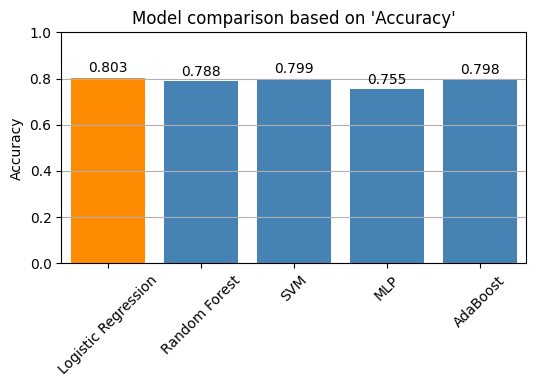

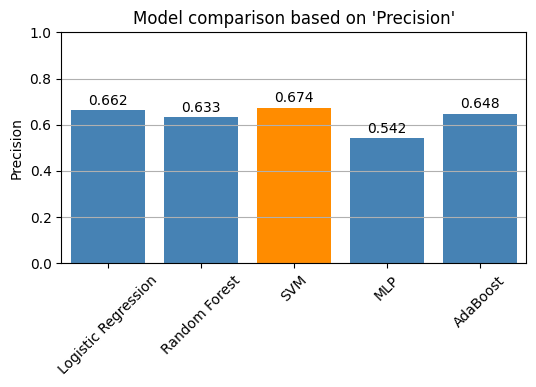

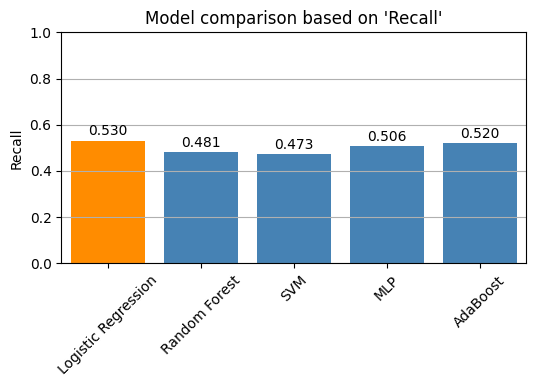

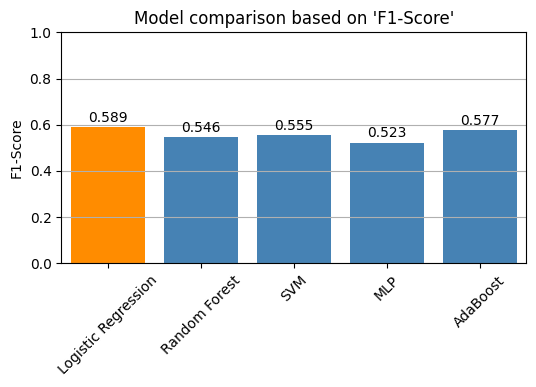

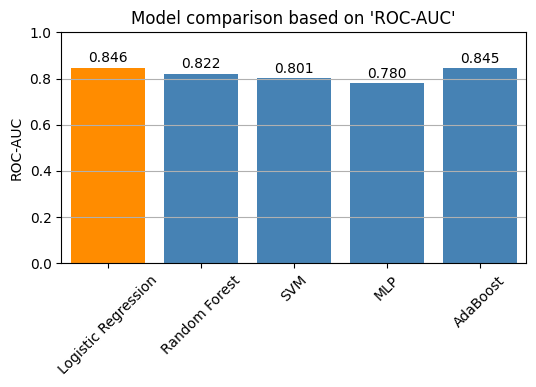

In [30]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for metric in metrics:
    plt.figure(figsize=(6, 3))
    values = mean_scores[metric].values
    max_idx = int(np.argmax(values))
    ax = sns.barplot(x='Model', y=metric, data=mean_scores, color='steelblue')
    # highlight the max bar
    for i, p in enumerate(ax.patches):
        if i == max_idx:
            p.set_facecolor('darkorange')
        else:
            p.set_facecolor('steelblue')
    plt.title(f"Model comparison based on '{metric}'")
    plt.ylabel(metric)
    plt.xlabel(None)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
    plt.show()

**Conclusion:** With an exception of 'Precision' metric, **Logistic Regression** has the highest mean value for all metrics. It has Accuracy = 80.3% and ROC-Auc = 84.6%

## Final model training

**Logistic regression** was chosen as the final model, as it had the highest mean ROC-AUC value. 
Model is trained on the entire training set (95% of data), and calibrated using CalibratedClassifierCV with 'sigmoid' method (because the dataset is small) and 5-fold cross-validation.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

# Base model
base_log_reg = LogisticRegression(
    random_state=2137,
    max_iter=1000
)
base_pipeline = make_pipeline(column_transformer, base_log_reg)
base_pipeline.fit(X, y)

# Calibrated model
calibrated_log_reg = CalibratedClassifierCV(
    estimator=base_log_reg,
    method="sigmoid",
    cv=5
)

calibrated_pipeline = make_pipeline(column_transformer, calibrated_log_reg)
calibrated_pipeline.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('calibratedclassifiercv', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif

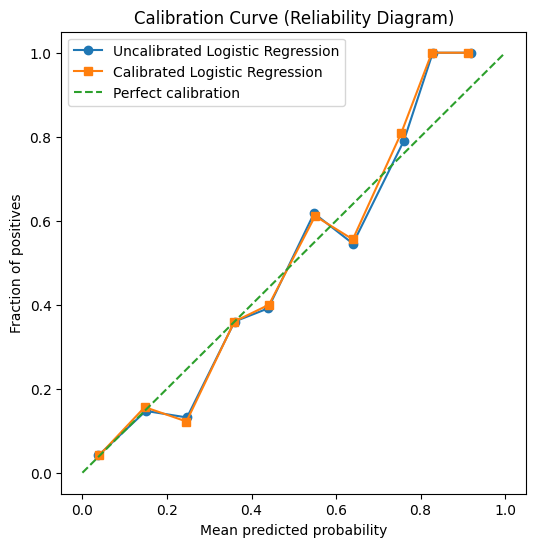

In [32]:
from sklearn.calibration import calibration_curve

X_holdout = holdout_df.drop('Churn', axis=1)
y_holdout = holdout_df['Churn'].map({'No': 0, 'Yes': 1})

# Predicted probabilities
prob_uncal = base_pipeline.predict_proba(X_holdout)[:, 1]
prob_cal = calibrated_pipeline.predict_proba(X_holdout)[:, 1]

# Calibration curves
frac_pos_uncal, mean_pred_uncal = calibration_curve(
    y_holdout, prob_uncal, n_bins=10
)

frac_pos_cal, mean_pred_cal = calibration_curve(
    y_holdout, prob_cal, n_bins=10
)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(mean_pred_uncal, frac_pos_uncal, marker='o', label="Uncalibrated Logistic Regression")
plt.plot(mean_pred_cal, frac_pos_cal, marker='s', label="Calibrated Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect calibration")

plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve (Reliability Diagram)")
plt.legend()
plt.show()

**Conclusion:** Calibration did not improve the model's probability estimates a lot. The uncalibrated model is already quite well calibrated, most probably because it is a **Logistic Regression**. Logistic Regression models tend to produce well-calibrated probabilities by default. Both calibrated and uncalibrated models perform similarly, but show a bit of overconfidence in the higher probability range (over 80%). The calibrated model shows a slight improvement in calibration, but the difference is not substantial.

-------------------------------------------------------------
Evaluating the final model on the holdout set:

Accuracy: base: 0.8267045454545454 ,calibrated: 0.8267045454545454
Precision: base: 0.686046511627907 ,calibrated: 0.6904761904761905
Recall: base: 0.6344086021505376 ,calibrated: 0.6236559139784946
F1: base: 0.659217877094972 ,calibrated: 0.655367231638418
ROC AUC: base: 0.8652385103998008 ,calibrated: 0.8654876074230913


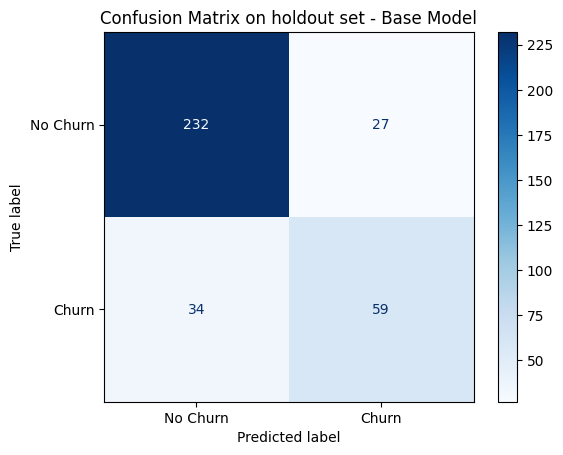

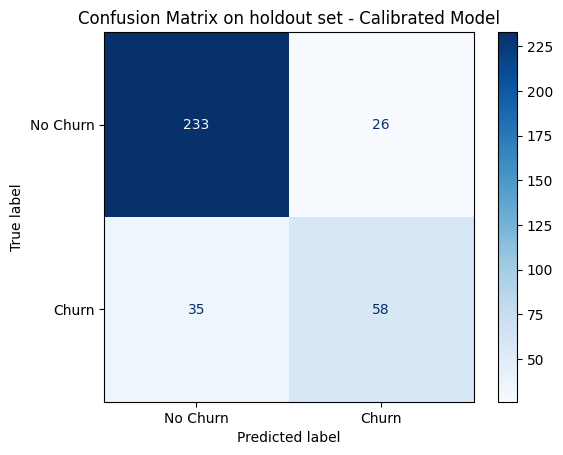

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_base = base_pipeline.predict(X_holdout)
y_prob_base = base_pipeline.predict_proba(X_holdout)[:, 1]
y_pred_calibrated = calibrated_pipeline.predict(X_holdout)
y_prob_calibrated = calibrated_pipeline.predict_proba(X_holdout)[:, 1]

print('Accuracy: base:', accuracy_score(y_holdout, y_pred_base), ',calibrated:', accuracy_score(y_holdout, y_pred_calibrated))
print('Precision: base:', precision_score(y_holdout, y_pred_base), ',calibrated:', precision_score(y_holdout, y_pred_calibrated))
print('Recall: base:', recall_score(y_holdout, y_pred_base), ',calibrated:', recall_score(y_holdout, y_pred_calibrated))
print('F1: base:', f1_score(y_holdout, y_pred_base), ',calibrated:', f1_score(y_holdout, y_pred_calibrated))
print('ROC AUC: base:', roc_auc_score(y_holdout, y_prob_base), ',calibrated:', roc_auc_score(y_holdout, y_prob_calibrated))

# confusion matrix
cm = confusion_matrix(y_holdout, y_pred_base, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on holdout set - Base Model")

cm = confusion_matrix(y_holdout, y_pred_calibrated, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix on holdout set - Calibrated Model")

plt.show()

**Conclusion** There is no significant difference in ROC AUC scores between the base and calibrated models (0.847 vs 0.849), nor in other metrics like accuracy, precision, recall, and F1-score.

-----------------------------------------------------------------
Visualizing feature importance using permutation importance:

                   feature  importance_mean  importance_std
0             TotalCharges         0.050366        0.011446
1                 Contract         0.034052        0.009425
2                   tenure         0.019323        0.008651
3           MonthlyCharges         0.018418        0.004985
4          InternetService         0.017440        0.005427
5              TechSupport         0.010343        0.003713
6            PaymentMethod         0.007220        0.002360
7         PaperlessBilling         0.006093        0.002164
8            MultipleLines         0.004640        0.002313
9   MonthlyChargesQuantile         0.003911        0.002547
10         StreamingMovies         0.001585        0.002136
11             StreamingTV         0.001496        0.001829
12        DeviceProtection         0.001028        0.001316
13              Dependents         0.000792        0.001029
14          OnlineSecurity         0.000393        0.002658
15            PhoneService         0.000

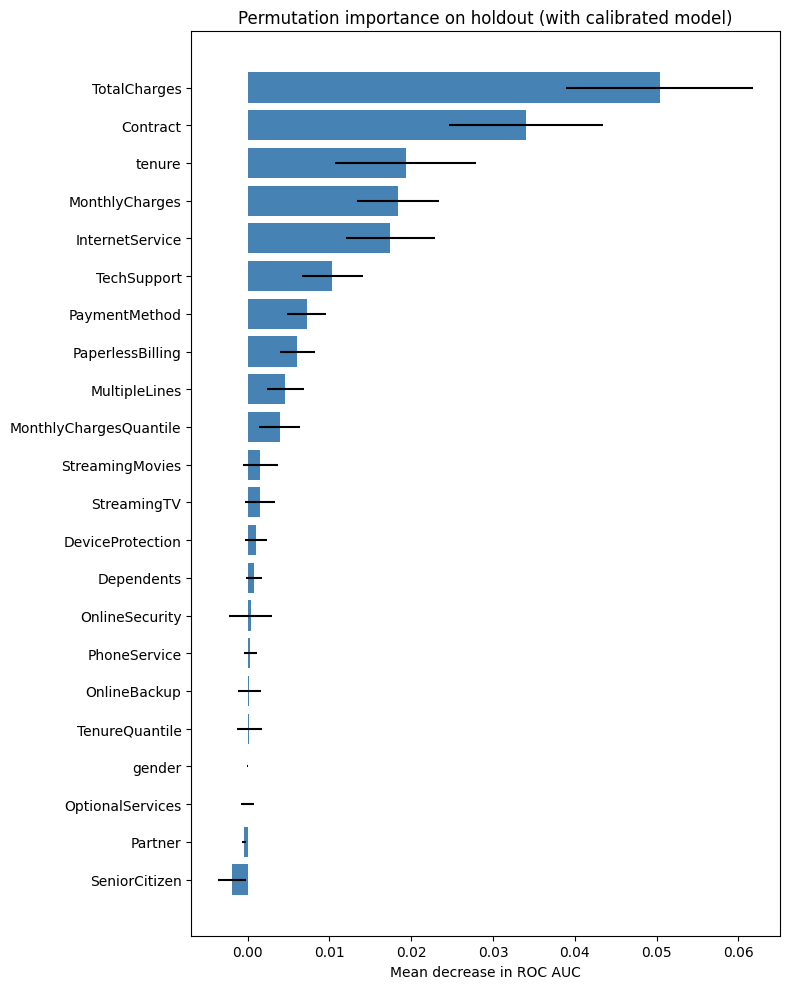

In [45]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    calibrated_pipeline,
    X_holdout,
    y_holdout,
    n_repeats=30,
    random_state=42,
    scoring='roc_auc'
)

importances_mean = r.importances_mean
importances_std = r.importances_std
feat_names = list(X_holdout.columns)
order = importances_mean.argsort()[::-1]

imp_df = pd.DataFrame({
    'feature': [feat_names[i] for i in order],
    'importance_mean': importances_mean[order],
    'importance_std': importances_std[order]
})
print(imp_df.head(20))

plt.figure(figsize=(8, 10))
plt.barh(imp_df['feature'], imp_df['importance_mean'], xerr=imp_df['importance_std'], color='steelblue')
plt.xlabel('Mean decrease in ROC AUC')
plt.title('Permutation importance on holdout (with calibrated model)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Conclusion**
The visualisation shows, that the most important feature is 'TotalCharges', with 'Contract' following. 'tenure', 'MonthlyCharges' and 'InternetService' values also strongly influence model's decision. Suprisingly, 'SeniorCitizen' is not considered an important value, despite previous analysis of countplots. 

----------------------------------------------------------------------------
Finally, the model is serialized to model.pkl, and saved in 'models' folder with a list of features (feature_schema.json). 

In [34]:
savepath_model = 'models/model.pkl'
savepath_features = 'models/feature_schema.json'

import pickle
with open(savepath_model, 'wb') as f:
    pickle.dump(calibrated_pipeline, f)
print(f"Model saved to {savepath_model}")

import json
feature_schema = {
    'numeric_features': numeric_features,
    'categorical_features': categorical_features
}
with open(savepath_features, 'w') as f:
    json.dump(feature_schema, f, indent=4)
print(f"Feature schema saved to {savepath_features}")

Model saved to models/model.pkl
Feature schema saved to models/feature_schema.json
